In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn 
%matplotlib inline

In [49]:
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [50]:
df.rename(columns = {'Gender' : 'gender' , 'Age' : 'age' , 'Annual Income (k$)' : 'income' , 'Spending Score (1-100)' : 'score' } , inplace =True)

In [51]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [44]:
df.age[0]

19

In [13]:
df.isnull().values.any()

False

In [15]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


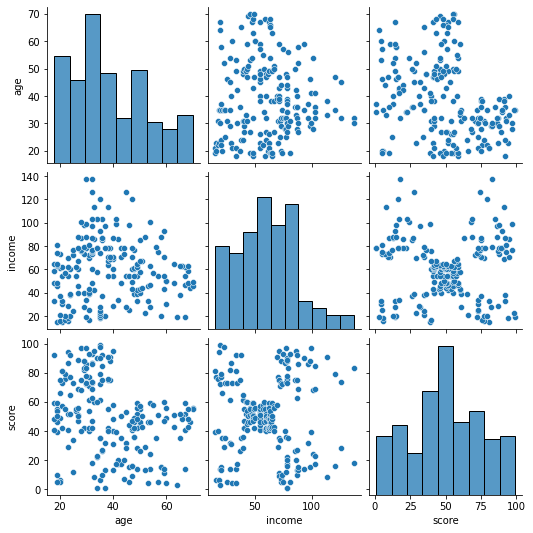

In [52]:
seaborn.pairplot(df[['age' , 'income' , 'score']])

In [53]:
import sklearn.cluster as cluster

In [54]:
kmeans = cluster.KMeans(n_clusters = 5)

In [55]:
kmeans = kmeans.fit(df[['score' , 'income']])

In [60]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154]])

In [58]:
df['income_clusters'] = kmeans.labels_

In [26]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [27]:
df['income_clusters'].value_counts()

1    81
3    39
0    35
4    23
2    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

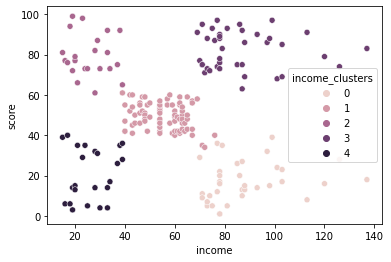

In [28]:
seaborn.scatterplot(x = 'income' , y = 'score' , hue = 'income_clusters', data = df)

In [35]:
kmeans = cluster.KMeans(n_clusters = 2)

In [36]:
kmeans = kmeans.fit(df[['age' , 'score']])

In [37]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [39]:
df['age_clusters'] = kmeans.labels_

In [40]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,1,1


<AxesSubplot:xlabel='age', ylabel='score'>

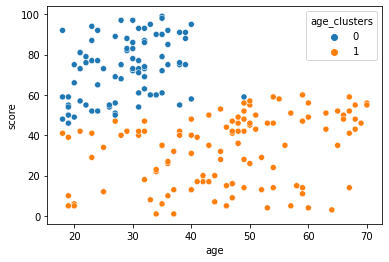

In [41]:
seaborn.scatterplot(x = 'age' , y = 'score' , hue = 'age_clusters', data = df)

In [2]:
df = pd.read_csv('medicine.csv')

In [3]:
df

,Object,weight index,pH value
0,A,1,4
1,B,2,3
2,C,4,2
3,D,5,3


In [4]:
import sklearn.cluster as cluster

In [5]:
kmeans = cluster.KMeans(n_clusters = 2)

In [6]:
kmeans = kmeans.fit(df[['weight index' , 'pH value']])

In [7]:
kmeans.cluster_centers_

array([[4.5, 2.5],
       [1.5, 3.5]])